# Introduction

ECG (Electro Cardiogram) and ECG signals :

An electrocardiogram — abbreviated as EKG or ECG — is a test that measures the electrical activity of the heartbeat.

With each beat, an electrical impulse (or “wave”) travels through the heart. 

This wave causes the muscle to squeeze and pump blood from the heart. A normal heartbeat on ECG will show the timing of the top and lower chambers. 

The right and left atria or upper chambers make the first wave called a “P wave" — following a flat line when the electrical impulse goes to the bottom chambers. 

The right and left bottom chambers or ventricles make the next wave called a “QRS complex." 

The final wave or “T wave” represents electrical recovery or return to a resting state for the ventricles.

# Ans for Qn 4


 The length of the time array is: 43081

 The signal obtained below is an ECG signal sampled at 750Hz with 12-bit resolution.


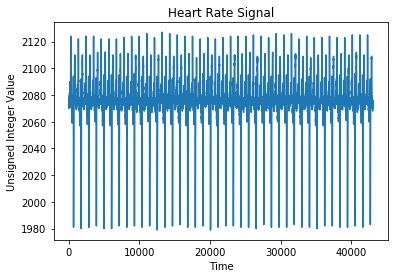

In [206]:
#we have first this command that initialize and matplotlib (library) for plotting and we specify that we want those plots inline in this notebook

%matplotlib inline

#now we import different packages that will allow to do math, linear algebra, numerical operations, array operations and plotting

import scipy as Sci
import scipy.linalg
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt

#we use a simple open command for the file
h = open('aami3a.dat','rb')
#we read it using a numpy (therefore the np.) command that allows direct reading from file into an array
Signal = np.fromfile(h,count=-1,dtype=np.uint16)
print('\n The length of the time array is: ' + str(len(Signal)) )

plt.plot(Signal)
plt.title("Heart Rate Signal")
plt.xlabel("Time")
plt.ylabel("Unsigned Integer Value")



print('\n The signal obtained below is an ECG signal sampled at 750Hz with 12-bit resolution.' )

# Ans for Qn 5

# If a person at rest has an average heart rate between 60 and 100 beats per minute, how many samples should you plot to obtain 5 beats in the signal?

Let us consider that the heart rate as 60 beats per minute.

So,it takes a time of 5 secs for 5 beats.

The signal obtained has a Sampling Frequency of 750 Hz.

Therefore we need 750 times 5 = 3750 samples to obtain 5 beats in the signal.

Similarily,for a Heart rate of 100 beats per minute,it takes 3 secs for 5 beats.

So,we need 750 times 3 = 2250 samples to obtain 5 beats in the signal.

Therefore the number of samples vary from 2250 to 3750 samples.

# Ans for Qn 6

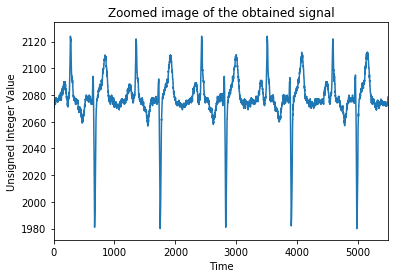

In [207]:
plt.xlim(0, 5500)
plt.plot(Signal)
plt.title("Zoomed image of the obtained signal")
plt.xlabel("Time")
plt.ylabel("Unsigned Integer Value")

# Ans for Qn 7

# Typical ECG signal 

The given ECG signal represents the shape of ECG signal of a Normal Person

So,the Heart Rate is neither low nor high for this individual,but is Normal.

# Ans for Qn 8

Since the Heart Rate is Normal , it can be estimated to be around 60 bpm to 100 bpm (bpm - Beats Per Minute)

# Ans for Qn 9


 Peak value of DFT is 4.98149090804


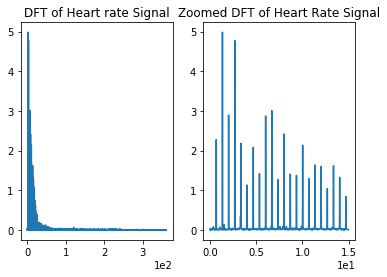

In [208]:
H = Signal[:43080]
#Here we obtain only the positive half of the signal
y = np.arange(21540)
#we need to eliminate any DC component in the signal
F_data = H-np.mean(H)
L = len(F_data)

#frequencies after performing fft will be between 0 and 1/2 of the actual sampling frequency
f=np.arange(0,720/2.,720/43080.)
Y=np.fft.fft(F_data)
#Here we are normalizing the positive frequencies
NoDc= abs(Y)/L

plt.subplot(121)
plt.plot(f,NoDc[:21540])
plt.title('DFT of Heart rate Signal')
plt.ticklabel_format(style='sci', axis ='x', scilimits=(0,0))

#zooming into just less than 15Hz
inx=np.where(f>15)
inx=inx[0]
plt.subplot(122)
plt.plot(f[:inx[0]], NoDc[:inx[0]])
plt.title('Zoomed DFT of Heart Rate Signal')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

p=np.amax(NoDc[:21540])
print('\n Peak value of DFT is ' +str(p) )

# Ans for Qn 10

In [209]:
for index in y:
    if NoDc[index]> 4.981:
        print ('Maximum value is observed at the frequency f=' +str(index/57.4) + ' Hz')
        break

Maximum value is observed at the frequency f=1.393728223 Hz


# Ans for Qn 11

In [210]:
Hbeat=60/1.393
print("The Heart rate observed from the spectrum is  " +str(Hbeat) +"bpm")

The Heart rate observed from the spectrum is  43.0725053841bpm


# Ans for Qn 12

The Discrete Fourier Transform (DFT) gives the Frequency analysis of any given signal.

The peaks obsserved in the DFT of the Heart Beat Signal are the Harmonics of the Heartbeat while the other smaller peaks are simply Noise elements,which can be easily eliminated by using a Low Pass Filter (LPF).

From the above,we obtained the peak value of DFT being at f=1.393 Hz and therefore the Heart Rate = 60/1.393 = 43.07 bpm approx.
Thus the detection of peaks in the DFT of Heart Beat helps to find the approximate Heart Beat value.

# Ans for Qn 13

A common problem in ECG interpretation is the removal of unwanted artifact and noise. 

To help with this our cardiac monitors provide a means to filter the ECG recording. Most cardiac monitors will choose the appropriate filter based on the situation.

All filters introduce distortion in the resulting output signal. This distortion can be in amplitude or phase. 

Low-pass filters on the ECG are used to remove high frequency muscle artifact and external interference. They typically attenuate only the amplitude of higher frequency ECG components. 

Analog low-pass filtering has a noticeable affect on the QRS complex, epsilon, and J-waves but do not alter repolarization signals.

# Ans for Qns 14 and 15

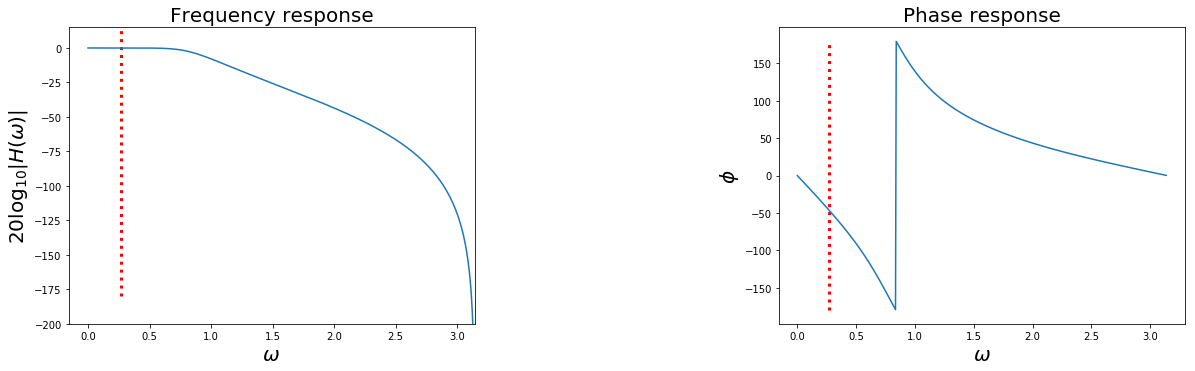

In [211]:
from __future__ import division
from matplotlib import gridspec
from scipy import signal
fig=plt.figure()
fig.set_size_inches((20,15))

gs = gridspec.GridSpec(2,2)
gs.update( wspace=0.75, hspace=0.75)

fs=750 # given sampling frequency
NF=fs/2 # nyquist frequency
cutoff= 100 # cutoff frequency
Wn=100/NF
b,a=signal.butter(4,Wn,btype='low')
w,h=signal.freqz(b,a)
s=signal.lfilter(b,a,F_data) # output signal of the Butterworth filter

x=np.arange(0,43080/750.,1/750.)
ax = fig.add_subplot(plt.subplot(gs[0,0]))
ax.set_title('Frequency response',fontsize=20)
ax.plot(w, 20 * np.log10(abs(h))) 
ax.set_ylabel(r"$ 20 \log_{10}|H(\omega)| $",fontsize=20)
ax.set_xlabel(r'$\omega$ ',fontsize=20)
ax.set_xlim(xmax = np.pi)
ax.set_ylim(ymin=-200,ymax=15)
ax.vlines(Wn,-180,180,linestyles=':',color='r',lw=3.)

ax = fig.add_subplot(plt.subplot(gs[0,1]))
plt.plot(w,np.angle(h)/np.pi*180)
ax.set_title('Phase response',fontsize=20)
ax.set_xlabel(r'$\omega$',fontsize=20)
ax.set_ylabel(r"$\phi $ ",fontsize=20)
ax.vlines(Wn,-180,180,linestyles=':',color='r',lw=3.)


# Ans for Qn 16

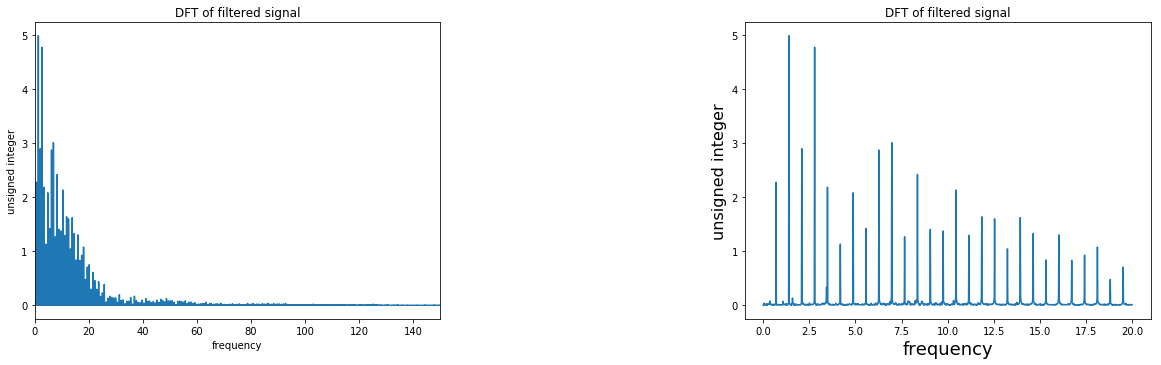

In [212]:
from matplotlib import gridspec
fig=plt.figure()
fig.set_size_inches((20,15))
gs = gridspec.GridSpec(2,2)
gs.update( wspace=0.75, hspace=0.75)
ax = fig.add_subplot(plt.subplot(gs[0,0]))
LL=len(s)
ff=np.arange(0,750,750/43080.)
YY=np.fft.fft(s)
Pyy=abs(YY)/LL
#Here we are Normalizing only the Positive Frequencies
ax = fig.add_subplot(plt.subplot(gs[0,0]))
ax.plot(ff, Pyy[:43080])
ax.set_title('DFT of filtered signal')
ax.set_xlabel('frequency')
ax.set_ylabel('unsigned integer')
ax.set_xlim(xmax = 150, xmin =0)
indx=np.where(ff>20)
indx=indx[0]
ax = fig.add_subplot(plt.subplot(gs[0,1]))
ax.plot(ff[:indx[0]], Pyy[:indx[0]])
ax.set_title('DFT of filtered signal')
ax.set_xlabel('frequency',fontsize=18)
ax.set_ylabel('unsigned integer',fontsize=16)


# Ans for Qn 17

The frequency response of the Butterworth filter has no ripples in the passband and the stopband. 
Therefore it is called a maximally flat filter. The advantage of Butterworth filters is the smooth, monotonically decreasing frequency response in the transition region.
Yes.The Butterworth Filter has an effect on the Heart Rate Signal.
The Frequency Response of the Heart Rate Signal has become flatter over the frequencies 0 to 1 Hz.
The Transition has become sharp due to the usage of Higher Oreder Filter (4th Order here).
Increase in the Order of the Filter may sharpen the Transition band,but the disadvantage is that the Amplitude of the signal is effected by the Increase in the Order of the Filter.

# Bibliography :

1) https://stackoverflow.com/questions/11400579/pyplot-zooming-in

2) http://www.ems12lead.com/2014/03/10/understanding-ecg-filtering/

3) FILTERING OF ECG SIGNAL USING BUTTERWORTH FILTER AND ITS FEATURE EXTRACTION by 
   BHARTI SALSEKAR Electrical Engineering Department
   M.I.T.S. Gwalior, M.P., INDIA
   and
   DR. A. K. WADHWANI
   Professor, Electrical Engineering Department
   M.I.T.S. Gwalior, M.P., INDIA
   http://www.idc-online.com/technical_references/pdfs/electrical_engineering/FILTERING%20OF%20ECG%20SIGNAL%20USING.pdf
   
4) http://zone.ni.com/reference/en-XX/help/370859J-01/genmaths/genmaths/calc_filterfir_iir/

5) https://dsp.stackexchange.com/questions/34127/higher-order-butterworth-filters